Setting up Image Captioning AI...
Loaded 3 images with captions.
Vocabulary size: 26
Max caption length: 9
Extracting features from images using ResNet50...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Extracted features for 3 images.
Defining and training the image captioning model...
Training for 10 epochs...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.0455 - loss: 4.3643  
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1581 - loss: 3.4470
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1222 - loss: 3.4431
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1733 - loss: 3.3910
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0710 - loss: 3.5424
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0303 - loss: 3.4002    
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1989 - loss: 3.1335
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━

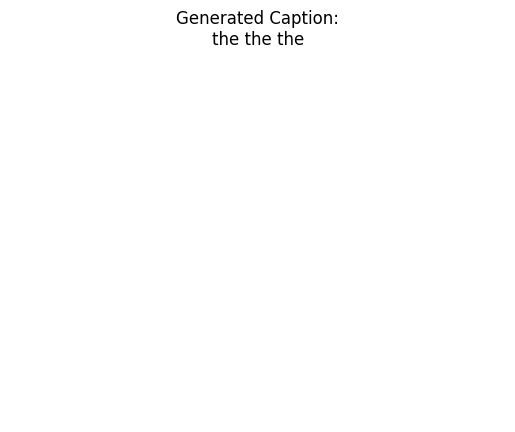

Image: image1.jpg -> Caption: the the the


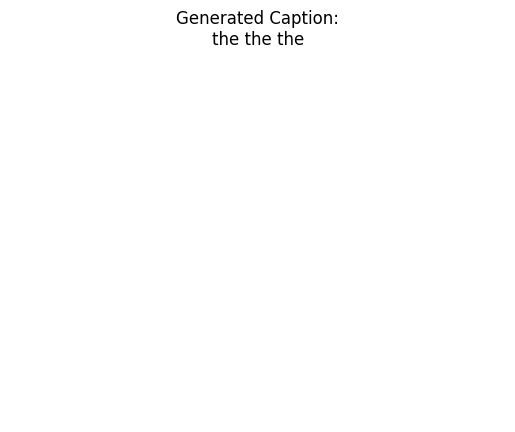

Image: image2.jpg -> Caption: the the the the


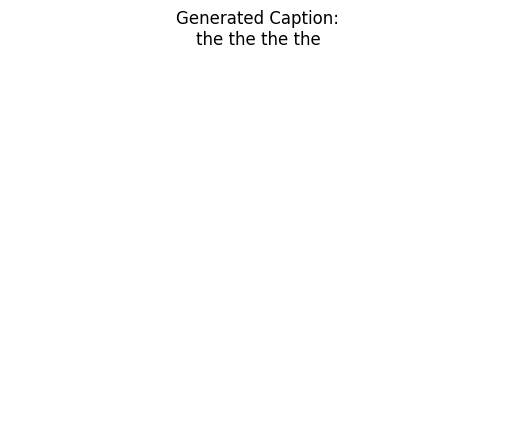


Image Captioning AI demonstration finished.


In [15]:
# Cell 1: Essential Imports (for general use, or if running all cells sequentially)
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Cell 2: (Formerly Image Feature Extractor - now empty, functions moved to Cell 7)
# All functions for feature extraction are now included in Cell 7 for self-containment.

# Cell 3: (Formerly Text Preprocessing and Tokenization - now empty, functions moved to Cell 7)
# All functions for text preprocessing and tokenization are now included in Cell 7 for self-containment.

# Cell 4: (Formerly Define the Image Captioning Model - now empty, functions moved to Cell 7)
# The model definition function is now included in Cell 7 for self-containment.

# Cell 5: (Formerly Data Generator for Training - now empty, functions moved to Cell 7)
# The data generator function is now included in Cell 7 for self-containment.

# Cell 6: (Formerly Caption Generation Helpers - now empty, functions moved to Cell 7)
# Caption generation helper functions are now included in Cell 7 for self-containment.

# Cell 7: Main Execution Block (Self-Contained with all functions and imports)
if __name__ == "__main__":
    print("Setting up Image Captioning AI...")

    # --- Re-import all necessary libraries for self-containment within this block ---
    import tensorflow as tf
    from tensorflow.keras.applications import ResNet50
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.preprocessing.text import Tokenizer
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    import re

    # --- 1. Load Pre-trained Image Recognition Model (ResNet50) ---
    def load_image_feature_extractor():
        """
        Loads a pre-trained ResNet50 model and modifies it to be used as a feature extractor.
        Removes the last classification layer.
        """
        base_model = ResNet50(weights='imagenet')
        model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
        return model

    # --- 2. Feature Extraction Function ---
    def extract_features(image_path, model):
        """
        Extracts features from an image using the pre-trained ResNet50 model.

        Args:
            image_path (str): The path to the image file.
            model (tf.keras.Model): The pre-trained image feature extraction model.

        Returns:
            numpy.ndarray: The extracted feature vector for the image.
        """
        try:
            img = image.load_img(image_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
            features = model.predict(img_array)
            return features.flatten()
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
            return None

    # --- 3. Text Preprocessing and Tokenization ---
    def preprocess_text(text):
        """
        Cleans and preprocesses a given text caption.
        Converts to lowercase, removes punctuation, and adds start/end tokens.
        """
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = 'startseq ' + text + ' endseq'
        return text

    def create_tokenizer(captions):
        """
        Creates a Keras Tokenizer from a list of captions.
        """
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(captions)
        return tokenizer

    # --- 4. Define the Image Captioning Model (Encoder-Decoder RNN) ---
    def define_model(vocab_size, max_length, feature_dim):
        """
        Defines the image captioning model using an Encoder-Decoder architecture.
        """
        inputs1 = Input(shape=(feature_dim,))
        fe1 = Dropout(0.5)(inputs1)
        fe2 = Dense(256, activation='relu')(fe1)

        inputs2 = Input(shape=(max_length,))
        se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
        se2 = Dropout(0.5)(se1)
        se3 = LSTM(256)(se2)

        decoder1 = tf.keras.layers.add([fe2, se3])
        decoder2 = Dense(256, activation='relu')(decoder1)
        outputs = Dense(vocab_size, activation='softmax')(decoder2)

        model = Model(inputs=[inputs1, inputs2], outputs=outputs)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    # --- 5. Data Generator for Training ---
    def data_generator(descriptions, features, tokenizer, max_length, vocab_size, batch_size):
        """
        A generator function to yield batches of training data.
        """
        X1, X2, y = list(), list(), list()
        n = 0
        while 1:
            for image_id, desc_list in descriptions.items():
                if image_id not in features:
                    print(f"Warning: Features not found for image_id: {image_id}. Skipping.")
                    continue

                for desc in desc_list:
                    seq = tokenizer.texts_to_sequences([desc])[0]
                    for i in range(1, len(seq)):
                        in_seq = seq[:i]
                        out_seq = seq[i]
                        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                        X1.append(features[image_id])
                        X2.append(in_seq)
                        y.append(out_seq)

                        n += 1
                        if n == batch_size:
                            # Changed to yield a tuple for the inputs
                            yield (np.array(X1), np.array(X2)), np.array(y)
                            X1, X2, y = list(), list(), list()
                            n = 0
            if n > 0:
                # Changed to yield a tuple for the inputs
                yield (np.array(X1), np.array(X2)), np.array(y)
                X1, X2, y = list(), list(), list()
                n = 0

    # --- 6. Helper for predicting a caption ---
    def word_for_id(integer, tokenizer):
        """
        Reverse lookup for tokenizer: given an integer, return the word.
        """
        for word, index in tokenizer.word_index.items():
            if index == integer:
                return word
        return None

    def generate_caption(model, tokenizer, photo, max_length):
        """
        Generates a caption for a given image feature vector.
        """
        in_text = 'startseq'
        for i in range(max_length):
            sequence = tokenizer.texts_to_sequences([in_text])[0]
            sequence = pad_sequences([sequence], maxlen=max_length)
            yhat = model.predict([photo, sequence], verbose=0)
            yhat = np.argmax(yhat)
            word = word_for_id(yhat, tokenizer)
            if word is None:
                break
            in_text += ' ' + word
            if word == 'endseq':
                break
        final_caption = in_text.replace('startseq ', '').replace(' endseq', '')
        return final_caption

    # --- Step 1: Simulate a small dataset ---
    # In a real application, you would load a dataset like Flickr8k, MS COCO, etc.
    # For demonstration, we'll use placeholder data.
    # Assume 'images' directory exists with 'image1.jpg', 'image2.jpg', etc.
    # And 'captions.txt' contains image_id and caption pairs.

    # Create dummy image files for demonstration
    if not os.path.exists('images'):
        os.makedirs('images')
    # Create simple blank images (replace with actual images for better results)
    for i in range(1, 4):
        plt.imsave(f'images/image{i}.jpg', np.random.rand(224, 224, 3))

    # Example captions (image_id.jpg, caption)
    dummy_captions_raw = [
        "image1.jpg,A dog is playing in the grass",
        "image1.jpg,The brown dog runs on the field",
        "image2.jpg,A cat is sleeping on the couch",
        "image2.jpg,The white cat rests peacefully",
        "image3.jpg,A bird is flying in the sky",
        "image3.jpg,The blue bird soars high"
    ]

    # Process captions and create descriptions dictionary
    descriptions = dict()
    for line in dummy_captions_raw:
        image_id, caption = line.split(',', 1)
        image_id = image_id.split('.')[0] # Remove .jpg extension
        caption = preprocess_text(caption)
        if image_id not in descriptions:
            descriptions[image_id] = list()
        descriptions[image_id].append(caption)

    print(f"Loaded {len(descriptions)} images with captions.")

    # Get all preprocessed captions for tokenizer fitting
    all_captions = []
    for image_id in descriptions:
        all_captions.extend(descriptions[image_id])

    tokenizer = create_tokenizer(all_captions)
    vocab_size = len(tokenizer.word_index) + 1
    print(f"Vocabulary size: {vocab_size}")

    # Determine maximum caption length
    max_length = max(len(tokenizer.texts_to_sequences([desc])[0]) for desc_list in descriptions.values() for desc in desc_list)
    print(f"Max caption length: {max_length}")

    # --- Step 2: Extract Features from Images ---
    print("Extracting features from images using ResNet50...")
    feature_extractor_model = load_image_feature_extractor()
    all_features = {}
    for image_file in os.listdir('images'):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            image_id = os.path.splitext(image_file)[0]
            if image_id in descriptions: # Only extract features for images with captions
                features = extract_features(os.path.join('images', image_file), feature_extractor_model)
                if features is not None:
                    all_features[image_id] = features
    print(f"Extracted features for {len(all_features)} images.")

    # Get feature dimension (e.g., 2048 for ResNet50's avg_pool output)
    feature_dim = list(all_features.values())[0].shape[0] if all_features else 0
    if feature_dim == 0:
        print("Error: No features extracted. Cannot proceed.")
        exit()

    # --- Step 3: Define and Train the Model ---
    print("Defining and training the image captioning model...")
    captioning_model = define_model(vocab_size, max_length, feature_dim)

    # Prepare data generator
    batch_size = 32 # Adjust batch size based on available memory
    # Calculate steps per epoch
    num_samples = sum(len(desc_list) * (len(tokenizer.texts_to_sequences([desc])[0]) - 1)
                      for desc_list in descriptions.values() for desc in desc_list)
    steps_per_epoch = num_samples // batch_size

    # If num_samples is 0, then set steps_per_epoch to 1 to avoid division by zero
    if steps_per_epoch == 0:
        steps_per_epoch = 1

    # Create a tf.data.Dataset from the generator with specified output signature
    # The generator yields: ((image_features, partial_caption_sequence), next_word_one_hot)
    # image_features: shape (None, feature_dim), dtype float32
    # partial_caption_sequence: shape (None, max_length), dtype int32
    # next_word_one_hot: shape (None, vocab_size), dtype float32
    output_signature = (
        (tf.TensorSpec(shape=(None, feature_dim), dtype=tf.float32),
         tf.TensorSpec(shape=(None, max_length), dtype=tf.int32)),
        tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)
    )

    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(descriptions, all_features, tokenizer, max_length, vocab_size, batch_size),
        output_signature=output_signature
    )

    # Train the model (for demonstration, a small number of epochs)
    epochs = 10 # Increase for better performance
    print(f"Training for {epochs} epochs...")
    captioning_model.fit(dataset, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1)
    print("Model training complete.")

    # --- Step 4: Generate Captions for new images ---
    print("\nGenerating captions for example images:")
    for image_file in os.listdir('images'):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join('images', image_file)
            image_id = os.path.splitext(image_file)[0]

            # Ensure the image was processed and has features
            if image_id in all_features:
                photo_feature = np.array([all_features[image_id]])
                caption = generate_caption(captioning_model, tokenizer, photo_feature, max_length)
                print(f"Image: {image_file} -> Caption: {caption}")

                # Display image and caption
                img = plt.imread(image_path)
                plt.title(f"Generated Caption:\n{caption}")
                plt.axis('off')
                plt.show()
            else:
                print(f"Skipping {image_file}: No features extracted or no corresponding captions were provided.")

    print("\nImage Captioning AI demonstration finished.")
